# Quantum tools and first quantum protocol

* <a href="#density"> Density Matrices </a>

* <a href="#cotp"> Classical One Time Pad </a>

* <a href="#qotp"> Quantum One Time Pad </a>
    
* <a href="#cqstates"> Classical Quantum States </a>

* <a href="#gmeasurements"> Generalized Measurements </a>
    
* <a href="#ptrace"> Partial Trace </a>

In [1]:
include("2_source/main.jl");

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10962818625470574020\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-721330717967092331\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10962818625470574020\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

<a id="density"></a>

## Density Matrices

An alternate way of writing quantum states is a density matrix. This description is essential when we want to describe part of a larger quantum system. For example, we may have two qubits A and B in a state $|\Psi_{AB}\rangle$ and would like to have a mathematical way of writing down the state of A.

A matrix $rho$, associated to the state $|\psi$, can be computed by taking the ket of psi times the bra of Psi, which is just the outer product.

$$ \rho = |\psi \rangle \langle \psi| $$

Here we will consider how to write down the state of a qubit if I only know that it's in state $|\psi_j\rangle$ with probability $p_j$. The rule will be that the density matrix will just be an average, namely we will be summing over $j$ and with probability $p_j$

$$ \rho = \sum_j p_j |\psi \rangle \langle \psi| $$

In order to see why a description based on density matrices is useful, let’s consider the probabilities of measurement outcomes. If my system was really in the state $|\psi_j \rangle$, given $|\psi_j \rangle$, then if I measure my qubit in the standard basis, the probability of getting outcome zero, would just be

$$ p_{0|j} = |\langle \psi_j | 0 \rangle |^2 $$

It's useful to write this out in terms of the trace (we will consider the trace is cyclic)

$$ p_{0|j} = 
Tr \left[ \langle 0 | \psi_j \rangle \langle \psi_j | 0 \rangle \right] = 
Tr \left[ | 0 \rangle \langle 0 | \psi_j \rangle \langle \psi_j | \right] $$

We would expect that the probability of observing outcome zero, would just be the average, meaning that if with probability $p_j$ I actually have the state $|\psi_j \rangle$, and for the state $|\psi_j \rangle$ I have a certain probability of getting a zero, then my overall probability of seeing a zero would be given by this term (the trace is linear, meaning that we can take the sum over $j$ and move it)

$$ p_0 = \sum_j p_j p_{0|j} = 
\sum_j p_j Tr \left[ | 0 \rangle \langle 0 | \psi_j \rangle \langle \psi_j | \right] =
Tr \left[ | 0 \rangle \langle 0 | \left( \sum_j p_j | \psi_j \rangle \langle \psi_j | \right) \right] = 
Tr \left[ | 0 \rangle \langle 0 | \rho \right]$$

When is a matrix $\rho$ a density matrix? That is should satisfy two conditions. 

- First $\rho \geq 0$, that is $\rho^\dagger = \rho$ ($\rho$ is Hermitian) and should have no negative eigenvalues. 

- Second, $Tr(\rho) = 1$

Also, we have a **pure state** if $\rho^2 = \rho$ and a **mixed state** if $\rho^2 \leq \rho$

In [2]:
using LinearAlgebra

# Let's define a density matrix
rho = 0.5 * [1 1; 1 1];

# Is rho Hermitian?
print("Hermitian ")
show(rho == rho')
print("\n")

# Does it have any negative eigenvalues?
print("Eigenvalues are ")
eVal = eigvals(rho);
show(eVal)
print("\n")

# Does it have trace 1?
print("Trace of rho is ")
trace = tr(rho);
show(trace)

Hermitian true
Eigenvalues are [0.0, 1.0]
Trace of rho is 1.0

Let's verify is the following matrix is a valid density matrix - i.e. - a valid quantum state.

$$\rho = \frac{1}{2} \left(\begin{array}{cc} 1 & - i\\ - i & 1\end{array}\right)$$

In [3]:
rho = 0.5 * [1 -im; -im 1];

print("Hermitian ")
show(rho == rho')
print("\n")

print("Eigenvalues are ")
eVal = eigvals(rho);
show(eVal)
print("\n")

print("Trace of rho is ")
trace = tr(rho);
show(trace)

Hermitian false
Eigenvalues are Complex{Float64}[0.5 - 0.5im, 0.5000000000000002 + 0.5000000000000001im]
Trace of rho is 1.0 + 0.0im

Let's now look at the other convenient feature of density matrices, namely that they allow us to represent probabilistic mixtures of states. 

Imagine that our qubit is in state

* $|\psi_0\rangle$ with probability $p_0$ 

and in 

* $|\psi_1\rangle$ with probability $p_1$

where $p_0 + p_1 = 1$

We can describe the effective state of the qubit as a density matrix $\rho$

$$ \rho = p_0 \cdot |\psi_0 \rangle\langle \psi_0| + p_1 \cdot |\psi_1 \rangle\langle \psi_1| $$

To see how this works, let us now compute some density matrices created by such a probablisitic process. Consider a process that prepares a qubit in the states

$$ |\psi_0\rangle = |0\rangle \quad \mbox{ with probability } p_0 = \frac{2}{3}\ $$
$$ |\psi_1\rangle = |+\rangle \quad \mbox{ with probability } p_1 = \frac{1}{3}\ $$

Let's now compute the density matrix

$$ \rho = p_0 \cdot |\psi_0 \rangle\langle \psi_0| + p_1 \cdot |\psi_1 \rangle\langle \psi_1| \:$$


In [4]:
ψ_0 = [1, 0]
ψ_1 = [1, 1]/sqrt(2)

p0 = 2/3;
p1 = 1/3;

rho0 = ψ_0 * ψ_0';
rho1 = ψ_1 * ψ_1';

rho = p0*rho0 + p1*rho1

2×2 Array{Float64,2}:
 0.833333  0.166667
 0.166667  0.166667

It is instructive to have a look at what this **density matrix looks like as a point on the Bloch sphere**, where pure states live on the surface of the Bloch sphere and mixed state in the interior.

The code below generates a Bloch sphere representation of $|0\rangle$, $|+\rangle$  and $\rho$.

In [5]:
# First we convert the two individual states to Bloch vectors
v_0 = ket_to_bloch(ψ_0) # construct the bloch vector associated with ψ_0
v_1 = ket_to_bloch(ψ_1) # idem.

f1 = figure(figsize=(8, 8)) # make a new figure
b1 = Bloch()  # instantiate bloch sphere instance

@manipulate for view_angle = [60, 15, -130], p_0 = 0:0.1:1
    clear(b1)
    add_vector(b1, v_0, "psi_0") # add v_0 to the bloch sphere
    add_vector(b1, v_1, "psi_1")
    
    # The density matrix rho has a Bloch vector that is the average of the two individual Bloch vectors!
    add_vector(b1, p_0*v_0 + (1-p_0)*v_1, "rho") # add Bloch vector of ρ which is a mixture of ψ_0 and ψ_1
        
    withfig(f1) do
        render(b1, view_angle)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view_angle"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 3,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
2, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fcd53cf75b0, Task (runnable) @0x00007fcd53cf75b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"60\",\"15\",\"-130\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"513433536773334129\",\"id\":\"9674898576406839247\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"513433536773334129\",\"id\":\"13201120604151659767\",\"type\":\"observab

<h3 style="color:#00A6D6;" >Exercise 1 </h3>

Suppose we have a qubit that is in the states

$$ \lvert\psi_0\rangle = \frac{\lvert0\rangle + i \: \lvert1\rangle}{\sqrt{2}} \quad \mbox{ with probability } p_0 = \frac{1}{2}\ $$


$$ \lvert\psi_1\rangle = \frac{\lvert0\rangle - i \:\lvert1\rangle}{\sqrt{2}}  \quad \mbox{ with probability } p_1 = \frac{1}{2}\ $$

Compute the density matrix $$ \rho = p_0 \cdot \lvert \psi_0 \rangle\langle \psi_0\rvert + p_1 \cdot \lvert\psi_1 \rangle\langle \psi_1\rvert $$

In [6]:
ψ_0 = [1, im]/sqrt(2);
ψ_1 = [1, -im]/sqrt(2);

p0 = 1/2;
p1 = 1/2;

rho0 = ψ_0 * ψ_0';
rho1 = ψ_1 * ψ_1';

rho = p0*rho0 + p1*rho1

2×2 Array{Complex{Float64},2}:
 0.5+0.0im  0.0+0.0im
 0.0+0.0im  0.5+0.0im

<h4 style="color:#00A6D6;"> Supplement to Exercise 1 </h4>

To get some intuition, you may again wish to visualize the situation in the Bloch sphere. As before, the code below generates an associated Bloch sphere: Different values of $p_0$ can be selected, $\rho$ is plotted accordingly. You can set the view to -30 or +60 degrees to get a clear view angle.

Can you think of any other two states $\lvert\psi_0\rangle$ and $\lvert\psi_1\rangle$ and probabilities $p_0$ and $p_1 = 1-p_0$ that would give the same density matrix as for the example above?

In [7]:
ψ_0 = [1, 1]/sqrt(2)
ψ_1 = [1, -1]/sqrt(2)

p0 = 1/2;
p1 = 1/2;

rho0 = ψ_0 * ψ_0';
rho1 = ψ_1 * ψ_1';

rho = p0*rho0 + p1*rho1
println("rho = ", rho)

v_0 = ket_to_bloch(ψ_0) # construct the bloch vector associated with ψ_0
v_1 = ket_to_bloch(ψ_1) # idem.

f2 = figure(figsize=(8, 8)) # let us make a new figure
b2 = Bloch()  # which features a Bloch sphere

@manipulate for view_angle = [15, 60, -30], p_0 = 0:0.1:1    
    clear(b2) # Clear the vectors/points out of Bloch sphere b2        
    add_point(b2, v_0, "psi_0") # add the ψ_0 to the Bloch sphere
    add_vector(b2, p_0*v_0 + (1-p_0)*v_1, "rho") # now also add the mixture of ψ_0 and ψ_1 : ρ₂.   
    add_point(b2, v_1, "psi_1") 
    
    withfig(f2) do
        render(b2, view_angle)
    end
end

rho = [0.4999999999999999 0.0; 0.0 0.4999999999999999]


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view_angle"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 3,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fcd2d9c3a90, Task (runnable) @0x00007fcd2d9c3a90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"60\",\"-30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"11005436904239219731\",\"id\":\"3020417195676284020\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"11005436904239219731\",\"id\":\"1397762068554874229\",\"type\":\"observ

<h3 style="color:#00A6D6;" >Exercise 2</h3>

Such a Bloch vector 

$$v = (v_x, v_y, v_z)$$ 

can be found by calculating the (Hilbert-Schmidt) inner product of $\rho$ with each of the Pauli matrices

$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \quad Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \quad Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \:$$

$$ \rho = \left( I + v_x X + v_y Y + v_z Z \right) $$

Namely 

$$v_x = \text{Tr}(X \cdot \rho),\quad  v_y = \text{Tr}(Y \cdot \rho), \quad  v_z = \text{Tr}(Z \cdot \rho)\:.$$

Consider the density matrix

$$ \rho = \left(\begin{array}{cc} 1 & 0 \\ 0 & 0\end{array}\right)$$

What is the Bloch vector $v= (v_x,v_y,v_z)$ associated with $\rho$?


In [8]:
rho = [1 0; 0 0];

pX = [0 1; 1 0];
pZ = [1 0; 0 -1];
pY = im * pX * pZ;

vx = tr(rho*pX)
vy = tr(rho*pY)
vz = tr(rho*pZ)

println("v_x = $vx")
println("v_y = $vy")
println("v_z = $vz")

v_x = 0
v_y = 0 + 0im
v_z = 1


If we decompose $\rho$ in this form, we can immediately see that all pure states are living on the surface of the Bloch sphere, meaning that the Bloch vector has length one. A mixed state lives in the inside of the Bloch sphere. In particular the maximally mixed state is in fact at the origin of the Bloch sphere. We can conclude that $\rho$ is a valid state if

$$ v_x + v_y + v_z \leq 1 $$

And for a maximally mixed state we have

$$ \rho = \frac{I}{2} $$

<a id="cotp"></a>

## Classical One Time Pad

Before turning to the first quantum crypto protocol - the quantum one time pad - let's investigate the classical one time pad. Here, we image that Alice and Bob already share a randomly generated key. Alice encrypts the message and sends it to Bob. Let's see how this works for the example below:

$$ m = \text{message} = 0011 $$

$$ k = \text{key} = 0101 $$

Resulting in the encrypted message

$$ e = \text{ciphertext} = \text{Enc}(\text{message},\text{key}) =\text{message} \oplus \text{key} \:$$

where $\oplus$ is the bit wise xor, i.e., the bitwise sum mod 2. 

Decrypting out example yields

$$ m = \text{decrypted message} = \text{Dec}(\text{ciphertext},\text{key}) = \text{ciphertext} \oplus \text{key} \:$$

The Julia syntax for bitwise sum mod 2 is `(a+b)%2`. Let's now perform these operations in Julia.

In [9]:
message = [0 0 1 1];
key = [0 1 0 1];
ciphertext = rem.(message + key, 2) # (message + key) % 2;
decrypted = rem.(ciphertext + key, 2) # (ciphertext + key) % 2;

print("Message ", message, "\n");
print("Key ", key, "\n");
print("Ciphertext ", ciphertext, "\n");
print("Decrypted message ", decrypted);

Message [0 0 1 1]
Key [0 1 0 1]
Ciphertext [0 1 1 0]
Decrypted message [0 0 1 1]

<h3 style="color:#00A6D6;" >Exercise 3 </h3>

Imagine that you are Bob. Decrypt the 

$$ \text{ciphertext} = 00$$

with 

$$ \text{key} = 11\ $$

What is the message?

In [10]:
ciphertext = [0 0];
key = [1 1];
decrypted = rem.(ciphertext + key, 2)

1×2 Array{Int64,2}:
 1  1

<h3 style="color:#00A6D6;" >Exercise 4 </h3>

Let's imagine Alice wants to send an image to Bob - here, we'll keep things simple and use a black and white image of 64x64 pixels. A black pixel in the image corresponds to a "0" and each white pixel corresponds to a "1". We provide you with the encrypted image and the key in the form of a binary array. Accordingly, we will ask you decrypt the image.

In [11]:
# variables imported from 2_source
key = key_ex5
cipherImage = encryptedImage

64×64 Array{Int64,2}:
 1  0  1  1  1  1  1  0  0  1  0  1  1  …  1  0  1  1  1  1  1  1  0  1  1  1
 1  0  1  1  0  0  1  1  0  1  0  0  1     0  0  1  1  1  1  0  1  1  1  1  1
 0  0  0  0  1  0  1  1  1  0  1  1  0     0  1  0  1  1  1  1  1  0  0  1  0
 1  1  0  1  0  0  1  1  0  1  1  1  1     1  0  1  1  1  1  0  0  1  1  1  0
 0  1  1  0  1  1  1  0  1  1  0  0  1     1  0  0  0  0  0  1  1  0  1  0  1
 1  1  0  0  0  1  1  0  0  1  1  0  1  …  1  1  0  1  1  1  0  1  0  0  0  0
 0  1  0  1  1  0  0  1  1  1  0  1  0     1  0  1  1  1  0  0  0  1  1  1  0
 0  1  1  0  0  1  1  1  0  1  0  1  1     1  0  1  1  1  1  0  0  0  1  0  0
 0  0  0  1  1  0  0  0  1  1  1  1  0     0  1  0  0  0  1  1  0  1  1  1  0
 0  1  0  1  1  0  1  0  0  0  1  0  1     0  1  0  1  1  0  1  1  1  1  0  0
 0  0  1  1  0  0  0  0  0  0  1  1  0  …  0  1  1  1  1  0  0  0  1  1  1  1
 1  0  1  0  1  1  0  0  1  1  1  1  0     1  0  1  1  1  1  1  1  0  1  1  1
 1  1  1  0  0  0  0  0  1  0  1  0  1    

Note that we can also think of the key as an image now. Let's display the key by itself.

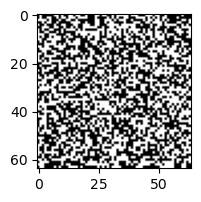

PyObject <matplotlib.image.AxesImage object at 0x7fcd276ea9d0>

In [12]:
image = key; 
f = figure(figsize=(2, 2))
ax = gca()
ax[:imshow](image, cmap=ColorMap("gray"))

Let's now display the encrypted image

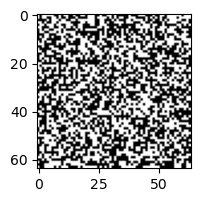

PyObject <matplotlib.image.AxesImage object at 0x7fcd274b5b10>

In [13]:
image = cipherImage;
f = figure(figsize=(2, 2))
ax = gca()
ax[:imshow](image, cmap=ColorMap("gray"))

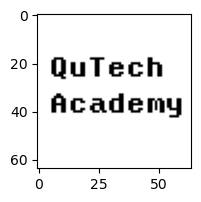

PyObject <matplotlib.image.AxesImage object at 0x7fcd28c72e10>

In [14]:
unenc_image = rem.(cipherImage + key, 2);

image = unenc_image;
f = figure(figsize=(2, 2))
ax = gca()
ax[:imshow](image,cmap=ColorMap("gray"))

So why is this scheme secure, in the sense that an instruder does not gain any information about the message?

Let's recall the demand for security, which is also known as Shannon secrecy. It essentially says, that the probability intruder assigns to a message $m$ is independent of having seen a particular instant of the ciphertext $e$. Note that this is equivalent to saying that the ciphertext $e$ is independent of the message

$$ P \left( M = m\right) = P \left( M = m | E = e\right) \forall m, e $$

Equivalent to

$$ P \left( E = e | M = m\right) = P \left( E = e\right) $$

$$ P \left( M = m, E = e\right) = P \left( M = m\right) P \left( E = e | M = m\right) =
P \left( E = e\right) P \left( M = m | E = e\right)
$$

In resume, an intruder can not gain any information about the message from something, like the ciphertext, that is independent of the message. Of course you can now wonder "where do these keys come from?". For the one time pad we used a key as long as the message. Our security calculation crucially depended on this.

Is there a scheme that could also be perfectly secure but use a smaller key? As Claude Shannon discovered a long time ago now, the answer is no. In order to be perfectly secure, we need a key that is as long as the message.

<a id="qotp"></a>

## Quantum One Time Pad

Let's now turn to the Quantum one time pad, and let's encrypt arbitrary qubits. The quantum one time pad encrypts the qubit
$$ \lvert \psi \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle $$
into 
$$\lvert e \rangle = \lvert \Psi_{\rm enc}\rangle = X^{k_0} Z^{k_1}\lvert \psi \rangle = X^{k_0} Z^{k_1}\lvert m \rangle$$ where $X$ and $Z$ are the Pauli matrices, and $k_0$, $k_1$ make up the shared key. To decrypt, Bob computes $Z^{k_1} X^{k_0} \lvert \Psi_{\rm enc}\rangle = \lvert m \rangle $

This beacause $Z$ is good to encrypt the Hadamard basis, $X$ is good to encrypt the standard basis, and both of them together are sufficient to encrypt an arbitrary qubit.

In [15]:
k0 = 0;
k1 = 1;

# psi = alpha |0> + beta |1>
α = cos(pi/8);
β = sin(pi/8);
ψ = [α; β];

pX = [0 1 ; 1 0];
pZ = [1 0 ; 0 -1];

# The encrypted qubit
psiEnc = pX^k0 * pZ^k1 * ψ;

# The decrypted qubit
psiDec = pZ^k1 * pX^k0 * psiEnc;

# Now, let us calculate the average state over all possible key combinations.
rho = zeros(2,2);
for k0 in 0:1, k1 in 0:1
    ψ_dec = (pX^k0) * (pZ^k1) * psiEnc # transform psi according to k0 and k1
    rho += ψ_dec * ψ_dec';
end

rho = rho/4; # normalize since p(k0,k1) = 1/4

# Let's print everything, rounding to 3 digits
print("Original qubit ", round.(ψ, digits=3), "\n");
print("Encrypted qubit ", round.(psiEnc, digits=3), "\n");
print("Decrypted qubit ", round.(psiDec, digits=3), "\n");
print("Average state over all possible keys ", round.(rho, digits=3));

Original qubit [0.924, 0.383]
Encrypted qubit [0.924, -0.383]
Decrypted qubit [0.924, 0.383]
Average state over all possible keys [0.5 0.0; 0.0 0.5]

To understand this average state over all possible keys it is instructive to visualize the different states on the Bloch sphere, along with the average state. 

In [16]:
f5 = figure(figsize=(8, 8))
b5 = Bloch()

# we want to manipulate our view angle, the key and we might want to see what Eve sees.
@manipulate for view_angle = [60, 15, -30]
    clear(b5)
    for k0 in 0:1, k1 in 0:1
        ψ_enc = (pX^k0) * (pZ^k1) * ψ
        v = ket_to_bloch(ψ_enc)  
        add_vector(b5, v, "k0 = $k0, k1 = $k1")  
    end
    add_point(b5, [0, 0, 0], "average state", 100) # on average the encoded states are located in the center.

    withfig(f5) do  
        render(b5, view_angle)
    end 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view_angle"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 3,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
2, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fcd53f3b340, Task (runnable) @0x00007fcd53f3b340), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"60\",\"15\",\"-30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"6807125663427885663\",\"id\":\"1738197074435456752\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"6807125663427885663\",\"id\":\"13440306337248824233\",\"type\":\"observa

<h3 style="color:#00A6D6;">Exercise 5 </h3>

Suppose the key that Alice and Bob share is $k_0k_1 = 10$. Bob receives the encrypted qubit 

$$|\psi_\text{enc}\rangle = \frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle \: $$

What is the decrypted qubit $|\psi\rangle$ that Alice wanted to send?

Remember to decrypt, Bob computes $Z^{k_1} X^{k_0} \lvert \Psi_{\rm enc}\rangle$


In [17]:
k0 = 1;
k1 = 0;

# psi = alpha |0> + beta |1>
α = 1/sqrt(3);
β = sqrt(2/3);
ψ = [α; β];

pX = [0 1 ; 1 0];
pZ = [1 0 ; 0 -1];

# The encrypted qubit
psiEnc = ψ;

# The decrypted qubit
psiDec = pZ^k1 * pX^k0 * psiEnc;

# Now, let us calculate the average state over all possible key combinations.
rho = zeros(2, 2);
for k0 in 0:1, k1 in 0:1
    ψ_dec = (pX^k0) * (pZ^k1) * psiEnc # transform psi according to k0 and k1
    rho += ψ_dec * ψ_dec';
end

rho = rho/4; # normalize since p(k0,k1) = 1/4

# Let's print everything, rounding to 3 digits
print("Encrypted qubit ", round.(psiEnc, digits=3), "\n");
print("Decrypted qubit ", round.(psiDec, digits=3), "\n");
print("Average state over all possible keys ", round.(rho, digits=3));

Encrypted qubit [0.577, 0.816]
Decrypted qubit [0.816, 0.577]
Average state over all possible keys [0.5 0.0; 0.0 0.5]

<a id="cqstates"></a>

## Classical Quantum States

This will be extremely useful for quantum cryptography, where we have a classical system holding a key and a quantum attacker who has a quantum state. Together, a classical quantum state. To see what this means, let's first have a look at what is a classical state. You can think of a classical density matrix as being a matrix that is diagonal in the standard basis, where we just list the probabilities on the diagonal. This is essentially a way to write down a classical probability distribution.

Let's suppose now that we have two quantum systems, one of them will call $X$ and the other one $A$. Imagine that there is just two qubits, $X$ and $A$. Their joint state can be in a very special state namely a $cq$-state, short for classical-quantum state. This naming reflects the fact that register $X$ just captures a classical probability distribution over what states $\rho_x^A$ are prepared on $A$ (the qubit $X$ contains some memory about which state has actually been prepared). So system $XA$ is in a classical quantum state $\rho_{XA}$ if

$$ \rho_{XA} = \sum_{x} p_x \cdot \lvert x \rangle \langle x \rvert^X \otimes \rho_x^A \:$$

You can see that this density matrix has a very special form, because it is classical on the $X$ part, but arbitrary on the $A$ part. We will investigate now with $X$ and $A$ just being a single qubit.

In [18]:
# Let's construct a cq state where X and A are qubits

# |0> and |1> and the corresponding density matrices |0><0| and |1><1| on X
v0 = [1; 0];
v1 = [0; 1];
xx_0 = v0 * v0';   # |0><0|
xx_1 = v1 * v1';   # |1><1|

# let's choose probabilities
p0 = 0.5;
p1 = 1 - p0;

# states on A
rho_0 = [0.5 0; 0 0.5];
rho_1 = [0 0; 0 1];

# Constructint the cq state
rho_XA = p0 * kron(xx_0, rho_0) + p1 * kron(xx_1, rho_1);

println("Probabilities: \n p_0 = $p0 \n p_1 = $p1 \n")
println("Quantum states on A: \n rho_0 = \n $rho_0 \n\n rho_1 = \n $rho_1 \n")
println("CQ-state: \n rho_XA = ")
rho_XA

Probabilities: 
 p_0 = 0.5 
 p_1 = 0.5 

Quantum states on A: 
 rho_0 = 
 [0.5 0.0; 0.0 0.5] 

 rho_1 = 
 [0 0; 0 1] 

CQ-state: 
 rho_XA = 


4×4 Array{Float64,2}:
 0.25  0.0   0.0  0.0
 0.0   0.25  0.0  0.0
 0.0   0.0   0.0  0.0
 0.0   0.0   0.0  0.5

<h3 style="color:#00A6D6;">Exercise 6</h3>

Given quantum states

$$ \rho_0^A \:\:  = \lvert - \rangle \langle - \rvert $$

$$ \rho_1^A \:\: = \lvert + \rangle \langle + \rvert $$

and probabilities

$$ p_0 = \frac{2}{3}, \quad p_1 = \frac{1}{3} $$

construct the associated classical quantum state: the 4 by 4 density matrix $\rho_{XA}$.

In [19]:
# Let's construct a cq state where X and A are qubits

# |0> and |1> and the corresponding density matrices |0><0| and |1><1| on X
v0 = [1; 0];
v1 = [0; 1];
ψ_plus = [1, 1]/sqrt(2)
ψ_minus = [1, -1]/sqrt(2)

xx_0 = v0 * v0';   # |0><0|
xx_1 = v1 * v1';   # |1><1|

# let's choose probabilities
p0 = 2/3;
p1 = 1 - p0;

# states on A
rho_0 = ψ_plus * ψ_plus';
rho_1 = ψ_minus * ψ_minus';

# Constructint the cq state
rho_XA = p0 * kron(xx_0, rho_0) + p1 * kron(xx_1, rho_1);

println("Probabilities: \n p_0 = $p0 \n p_1 = $p1 \n")
println("Quantum states on A: \n rho_0 = \n $rho_0 \n\n rho_1 = \n $rho_1 \n")
println("CQ-state: \n rho_XA = ")
rho_XA

Probabilities: 
 p_0 = 0.6666666666666666 
 p_1 = 0.33333333333333337 

Quantum states on A: 
 rho_0 = 
 [0.4999999999999999 0.4999999999999999; 0.4999999999999999 0.4999999999999999] 

 rho_1 = 
 [0.4999999999999999 -0.4999999999999999; -0.4999999999999999 0.4999999999999999] 

CQ-state: 
 rho_XA = 


4×4 Array{Float64,2}:
 0.333333  0.333333   0.0        0.0
 0.333333  0.333333   0.0        0.0
 0.0       0.0        0.166667  -0.166667
 0.0       0.0       -0.166667   0.166667

<a id="gmeasurements"></a>

## Generalized Measurements

The formalism of measuring a state in a basis doesn't let you answer all possible kinds of questions that you might want to ask about a quantum system. For example, imagine that your state is described by a density matrix $rho_{AB}$ over two systems, $A$ and $B$. Then what happens if you want to measure only system $A$? What is the probability of obtaining a certain outcome? And how will the state on B be affected by the result of the outcome of the measurement performed on system A? This is the kind of question that we'd like to answer.

Another question that you might want to ask is what if I wanted to measure the d-dimensional quantum state using the measurement that has, let's say, only two outcomes -- a yes/no kind of measurement?

Another question that's a natural one is to ask if all measurements necessarily have to completely destroy the state that they're performed on. This we've seen that measuring in the basis, after you've performed the measurement the state is projected on the basis vector that is consistent with the outcome that you obtained. Is this completely necessary? Could you make a weaker kind of measurement that only perturbs the state a little bit?

To answer this questons, first let's review briefly what we've seen before.

### Measure pure states

So let's imagine that we're given a pure state described by a unit vector in d-dimensional complex space. And now we measure this state in a certain basis

- State $|\psi \rangle \in \mathbb{C}^{d}$

- Basis we measure in $\{|b \rangle \}_{\mathbb{C}^{d}}$

- Probabilities of measurement outcomes $Pr\left(|b \rangle \right) = |\langle b | \psi \rangle |^2$

- What happen after measurements? The state is projected to the basis vector $|\psi \rangle \longrightarrow |b \rangle$

### Measure density matrices

When we measure mixed states described by a density matrix $\rho$

- Density matrix $|\rho \in \mathbb{C}^{dxd}$

- Basis we measure in $\{|b \rangle \}$

- Probabilities of measurement outcomes $ Pr\left(|b \rangle \right) = \langle b | \rho | b \rangle = Tr \left( |b\rangle \langle b| \rho \right)$

- What happen after measurements? The density matrix it's projected onto a rank 1 density matrix that is simply the projection on the basis vector $\rho \longrightarrow |b\rangle \langle b|$

### General measurements

Let's learn about general measurements now.

So the most general kind of measurements in quantum mechanics are called **positive operator valued measure (POVM)**. It's given by a list of matrices. These matrices are $d x d$ and one of two $M_k$. So there's not necessarily $d$ of these matrices. There could be more than $d$. There could be less than $d$. And there's two conditions that these matrices have to satisfy

- $M_i \geq 0 \rightarrow M_i = M^T_i \ \forall \ |\psi \rangle \in \mathbb{C}^{dxd} ,\ \langle \psi | M_i | \psi \rangle$

- $\sum M_i = 1$

And now suppose we are given a state described by a density matrix whole and a POVM described by matrices $M_1$ up to $M_k$, what is the rule? What happens? What outcome do you get? And what happens to the state once we've obtained a certain outcome?

#### Measurements rules

So the outcomes correspond to the matrices. So we have $k$ possible outcomes. And the probability of obtaining a certain outcome $i$ is given by $Pr(i) = Tr \left( M_i \rho \right)$

Let's prove that this definition are a general case of the previous one

$$|\psi \rangle,\ \{|b \rangle \},\ M_b = |b\rangle \langle b| \geq 0 $$

- Case 1: pure states

$$ \langle \psi| M_b |\psi\rangle = |\langle b|\psi \rangle |^2$$

$$ \sum_{b} M_b = \sum_{b} |b\rangle \langle b| = 1 $$

- Case 2: density matrices (Born Rule)

$$ Pr(b) = Tr\left( M_b \rho\right) = Tr\left( |b\rangle \langle b|\rho\right) = \langle b|\rho |b\rangle$$

In order to completely specify the post-measurement states, we need to be given a little bit more than the $M_k$. We need to be given what are called **Kraus operators associated with $M$** and we can define as

$$ E_i \in \mathbb{C}^{dxd} \ / \ E^+_iE_i = M_i$$

And now once we have specified the Kraus operators, this specifies the post-measurement state

$$ |\psi\rangle \longrightarrow \frac{E_i\psi E^+_i}{Tr\left( E_i\psi E^+_i\right)}$$

#### Example

As an interesting example of a partial measurement, let's imagine that we have 2 qubits. Instead of measuring in the standard basis, we are actually only interested in the parity in the standard basis. Interestingly enough we could peform a measurement with the following measurement operators, where the outcome corresponds to the parity

$$M_0 = |0\rangle\langle 0| \otimes |0\rangle \langle 0| + |1\rangle\langle 1| \otimes |1\rangle \langle 1| = |00\rangle\langle 00| + |11\rangle\langle 11|$$
$$M_1 = |1\rangle\langle 1| \otimes |0\rangle \langle 0| + |0\rangle\langle 0| \otimes |1\rangle \langle 1| = |01\rangle\langle 01| + |10\rangle\langle 10|$$

Why bother? We could of course just measure in the standard basis, and then compute the parity bases on the classical measurement outcomes? 

It turns out that the post-measurement state of these two approaches differs. Performing a measurement with the operators above the post-measurement we get when measuring $\rho$ are

$$\text{Post-measurement state after outcome 0: }\qquad\rho_\text{post 0} = \frac{M_0 \rho M_0^\dagger}{Tr\left(M_0 \rho M_0^\dagger\right)}$$
$$\text{Post-measurement state after outcome 1: }\qquad\rho_\text{post 1} = \frac{M_1 \rho M_1^\dagger}{Tr\left(M_1 \rho M_1^\dagger\right)}$$

However, the post-measurement states that we would get for measuring in the standard basis are just given by the standard basis elements $\{|00\rangle, |01\rangle,|01\rangle,|11\rangle\}$. Even if we were to forget the measurement outcomes and just remember the parity we would have the following density matrices only

$$\text{Post-measurement state for parity 0, full measurement: }\qquad\sigma_\text{post 0} = \frac{|00\rangle\langle 00|\rho |00\rangle\langle 00| + |11\rangle\langle 11| \rho |11\rangle \langle 11|}
{Tr\left(M_0 \rho M_0^\dagger\right)}$$
$$\text{Post-measurement state for parity 1, full measurement: }\qquad \sigma_\text{post 1} = \frac{|01\rangle\langle 01| \rho |01\rangle \langle 01|+|10\rangle\langle 10| \rho |10\rangle \langle 10|}
{Tr\left(M_1 \rho M_1^\dagger\right)}$$

Let's explore this difference

In [23]:
# Suggested example states. Change this to explore
epr = [1; 0; 0; 1]/sqrt(2);
singlet = [0; 1; -1; 0]/sqrt(2);

rho = kron(epr',epr); # Default is the EPR pair on two qubits

# Let's first define the standard basis for two qubits
v00 = [1; 0; 0; 0];
v01 = [0; 1; 0; 0];
v10 = [0; 0; 1; 0];
v11 = [0; 0; 0; 1];

# Let's define the projectors onto the standard basis elements
proj00 = v00*v00';
proj01 = v01*v01';
proj10 = v10*v10';
proj11 = v11*v11';

# Let's define the parity measurement operators
M0 = proj00 + proj11;
M1 = proj01 + proj10;

# Let's compute the probabilites of seeing parity 0 and parity 1
p0 = tr(M0 * rho); # Just one M0 - it's a projector so M0 * M0 = M0
p1 = tr(M1 * rho);

# Let's compute the post measurement states
rhoPost0 = M0*rho*M0'/p0;
rhoPost1 = M1*rho*M1'/p1;

sigmaPost0 = (proj00*rho*proj00 + proj11*rho*proj11)/p0;
sigmaPost1 = (proj01*rho*proj01 + proj10*rho*proj10)/p1;

# Let's display the matrices, rounding to 3 digits
if(p0 > 0)
    print("Post measurement state after outcome 0, parity measurement\n", round.(rhoPost0, digits=3),"\n\n")
    print("Post measurement state of parity 0, full measurement\n", round.(sigmaPost0, digits=3),"\n\n")
else
    print("Outcome 0 never occurs - no even parity components \n")
end

if(p1 > 0)
    print("Post measurement state after outcome 1, parity measurement\n", round.(rhoPost1, digits=3),"\n\n")
    print("Post measurement state for parity 1, full measurement\n", round.(sigmaPost1, digits=3),"\n\n")
else
    print("Outcome 1 never occurs - no odd parity components \n")
end

Post measurement state after outcome 0, parity measurement
[0.5 0.0 0.0 0.5; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.5 0.0 0.0 0.5]

Post measurement state of parity 0, full measurement
[0.5 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.5]

Outcome 1 never occurs - no odd parity components 


<h3 style="color:#00A6D6;">Exercise 7 </h3>

Imagine that Alice and Bob each have a qubit and that they have managed to prepare the qubits in the entangled state 

$$ \lvert \psi_{AB} \rangle = \frac{1}{\sqrt2} \Big( \lvert 00 \rangle_{AB} + \lvert 11 \rangle_{AB} \Big)\: $$

Written as a density matrix, the state is thus

$$ \rho_{AB} = \lvert \psi_{AB} \rangle \langle \psi_{AB} \rvert $$

Now imagine that Alice measures the state of her qubit $A$ in the standard basis. This measurement can be described using the following measurement operators in which we tensor the elements of the standard basis on Alice's qubit $A$ with the identity (i.e., ''do nothing'') on Bob's qubit $B$.

$$ M_0^A = \lvert 0 \rangle \langle 0 \rvert_A \otimes I_B $$

$$ M_1^A = \lvert 1 \rangle \langle 1 \rvert_A \otimes I_B \:$$

Accordingly the probability that Alice obtains outcomes $a$ when measuring is

$$ p_a = P(A=a) = \text{Tr} \Big( M_a^A \cdot \rho_{AB} \Big ) $$

<b> Compute $p_0$ and $p_1$. </b>


In [27]:
# Suggested example states. Change this to explore
epr = [1; 0; 0; 1]/sqrt(2);
rho = kron(epr',epr); # Default is the EPR pair on two qubits

# Let's first define the standard basis for two qubits
v00 = [1; 0; 0; 0];
v01 = [0; 1; 0; 0];
v10 = [0; 0; 1; 0];
v11 = [0; 0; 0; 1];

# Let's define the projectors onto the standard basis elements
proj00 = v00*v00';
proj01 = v01*v01';
proj10 = v10*v10';
proj11 = v11*v11';

# Let's define the parity measurement operators
M0 = proj00 + proj01
M1 = proj11 + proj10

# Let's compute the probabilites of seeing parity 0 and parity 1
p0 = tr(M0 * rho); # Just one M0 - it's a projector so M0 * M0 = M0
p1 = tr(M1 * rho);

print("Probability Alice measures 0: ", p0, "\n")
print("Probability Alice measures 1: ", p1, "\n")

Probability Alice measures 0: 0.4999999999999999
Probability Alice measures 1: 0.4999999999999999


<h3 style="color:#00A6D6;">Exercise 8</h3>

For the measurement considered above, what are the post-measurement states $\rho^{a}_{AB}$ on qubits $A$ and $B$ for Alice's measurement outcomes $a \in \{0,1\}$?

Compute the post-measurement states $\rho^0_{AB}$ and $\rho^1_{AB}$ for Alice's measures. To help you get started 

$$ \rho^{a=0}_{AB} = \frac{M_0^A \cdot \rho_{AB} \cdot  M_0^A}{p_{a=0}} $$  

$$ \rho^{a=1}_{AB} = \frac{M_1^A \cdot \rho_{AB} \cdot  M_1^A}{p_{a=1}} $$  

In [31]:
rhoPost0 = M0*rho*M0'/p0;
rhoPost1 = M1*rho*M1'/p1;

print("Alice post-measurements: \n")
print("Post-measurement P_a=0 is rho_0 = ", rhoPost0, "\n")
print("Post-measurement P_a=1 is rho_1 = ", rhoPost1, "\n")

Alice post-measurements: 
Post-measurement P_a=0 is rho_0 = [1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
Post-measurement P_a=1 is rho_1 = [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0]


<a id="ptrace"></a>
<h2 style="color:#00A6D6;"> Partial Trace </h2>

In this section, we will discuss 'how to compute reduced states'. 

Let's imagine that we have two qubits $A$ and $B$; and the overall state of the system is described by some density matrix $\rho_{AB}$. So the question is: If we don't care about both of these qubits, how can we find the density matrix of $A$?

Let's consider the following state

$$ \rho_{AB} = \frac{1}{2} \Big( |0\rangle \langle 0|_{A} + |0\rangle \langle 0|_{B} + |1\rangle \langle 1|_{A} + |1\rangle \langle 1|_{B} \Big) $$

We can imagine this density matrix as being generated by a process that with probability half prepares the two qubits in the state 0 for $A$ and $B$; and with probability half prepares the state in 1 for $A$ and $B$. For both of these cases, we actually already know what we would expect $\rho_{A}$ to be. So using our usual rule for computing mixed states, we expect that here with probability half we have 0 and with probability half we have 1.

$$ \rho_{A} = \frac{1}{2} \Big( |0\rangle \langle 0|_{A} + |1\rangle \langle 1|_{A} \Big) = \frac{I}{2}$$

In general, $\rho_{A}$ can be computed by taking what is called the **partial trace with respect to $B$**. So, in other words, $\rho_{A}$ is the trace with respect to $B$ of the state $\rho_{AB}$.

$$ \rho_{A} = \text{Tr}_{B}(\rho_{AB}) = \frac{1}{2} \Big( |0\rangle \langle 0|_{A} + \text{Tr}[|0\rangle \langle 0|_{B}] + |1\rangle \langle 1|_{A} + \text{Tr}[|1\rangle \langle 1|_{B}] \Big) $$

*Note: Remember that the trace operation is cyclic*.

Let's now have a look at a more complicated example, where $\rho_{AB}$ is an entangled state. In this case we are going to consider the EPR state

$$ \rho_{AB} = |\psi \rangle \langle \psi| ,\ \lvert \psi \rangle = \frac{1}{\sqrt2} \Big( \lvert 00 \rangle_{AB} + \lvert 11 \rangle_{AB} \Big)\  $$

We obtain that $\rho_{A} = \text{Tr}_{B}(\rho_{AB}) = \frac{1}{2} \Big( |0\rangle \langle 0|_{A} + |1\rangle \langle 1|_{A} \Big) = \frac{I}{2} $

So different descriptions of $\rho_{AB}$, that is different density matrix $\rho_{AB}$, can lead to the same reduced state on $A$.

So let we now summarize of how we can compute the partial trace; and this is one way of computing it. Taking the partial trace with respect to $B$, we write out our density matrix in terms of the bases of matrices. Any matrix $\rho_{AB}$ can be written in this form.

$$ \rho_{A} = \text{Tr}_{B}(\rho_{AB}) = \sum_{ijkl} c^{kl}_{ij} |i \rangle \langle j|_{A} \otimes \text{Tr} [|k \rangle \langle l|_{B}] = \sum_{ij} \Big( \sum_{k} c^{kk}_{ij} \Big) |i \rangle \langle j|_{A}$$

So this is how to compute the partial trace.

<h3 style="color:#00A6D6;"> Exercise 9 </h3>

Given 

$$ \rho_{AB} = \frac{1}{2} \cdot \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \end{pmatrix} $$


(a.) <b> what is $\rho_A$? </b>

For clarity $\rho_A = \text{Tr}_B \Big( \rho_{AB} \Big)$.

(b.) <b> what are the measurement probabilities </b>

$$p_0 = \text{Tr}\big(\lvert 0 \rangle \langle 0 \rvert \cdot \rho_A\big)$$
$$p_1 = \text{Tr}\big(\lvert 1 \rangle \langle 1 \rvert \cdot \rho_A\big) \:?$$

Not graded: Do you get the same results as in exercise 8? 

<h3 style="color:#00A6D6;"> Exercise 10 </h3>

A three party quantum state that has its own name is the GHZ state:

$$ \lvert GHZ \rangle =  \frac{1}{\sqrt{2}} \Big( \lvert 000 \rangle + \lvert 111 \rangle \Big) $$

Written as a density matrix, the state is thus:

$$ \rho_{ABC} = \lvert GHZ \rangle\langle GHZ \rvert$$

<b> Compute density matrices $\rho_{AB}$, $\rho_{BC}$ and $\rho_{AC}$ .</b>